# Case Study on Correlation and Regression

### Importing the required libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [135]:
warnings.filterwarnings('ignore')

In [136]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Reading and Understanding the given dataset

In [137]:
# Importing the dataset into Pandas DataFrame
data = pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [138]:
# Checking the dataset for 'Null' values
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

There are no 'null' values in the dataset. Thus, no cleaning is required.

In [139]:
# The concise summary of the dataframe is given as 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [140]:
# Descriptive Statistics of the given dataset is generated as
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


## 1. Relationship - Amount on Advertising and Profit Generated

<AxesSubplot:>

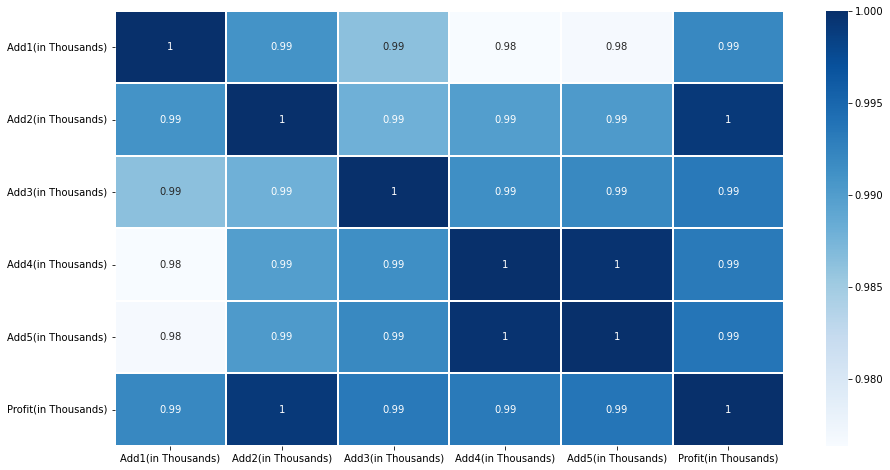

In [141]:
# To check for any relationship between the amount spent on advertising and profit generated.
# This is achieved using the 'heatmap' plot in Seaborn
plt.subplots(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, linewidths=1.5, cmap='Blues')

#### Inference from the above heatmap
> We know that The sign and absolute value of the correlation coefficient describe the direction and the magnitude of the relationship between two variables. It always ranges from -1 to +1, where the greater the absolute value of a correlation, the stronger will be linear relationship.

> Here, we can see that the colour code denoted the relationship between the profit generated and Add2 is more blue than others. This shows that the relationship is stronger. Also, the other 'Adds' also have strong relation with the 'Profit' as their correlation coefficient is closer to 1.


## 2. Build a regression model to predict the profit from the given data

In [149]:
# Defining the independent and dependent variables
x = data.drop(['Date','Profit(in Thousands)'], axis=1)
y = data['Profit(in Thousands)']

In [143]:
# Creating train and test data by splitting the given dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [144]:
# initializing Linear Regression
lrg = linear_model.LinearRegression()

In [150]:
# Fitting the x-values to y-values
model = lrg.fit(x_train,y_train)

In [160]:
predict = model.predict(x_test)
predict

array([5667.25 , 5861.83 , 5789.791, 4566.31 , 5163.693, 4464.11 ,
       5004.282, 4916.064, 5013.207, 4480.363, 5239.06 , 4178.008,
       5717.838, 4477.226, 5465.277, 4326.782, 4391.665, 5250.15 ,
       4623.793, 4513.6  , 4470.775, 5190.814, 5397.739, 4977.891,
       4643.716, 4190.965, 5163.322, 5430.79 , 5890.012, 4676.653,
       5250.775, 5453.24 , 5057.155, 4482.183, 4836.837, 5133.766,
       4418.709, 4404.686, 5140.372, 4887.296, 5146.949, 5565.444,
       4435.571, 4915.682, 4461.325, 4175.677, 4465.95 , 4763.69 ,
       4922.845, 5245.14 , 6101.648, 6137.8  ])

In [152]:
print(y_test)

195    5667.250
186    5861.830
172    5789.791
32     4566.310
75     5163.693
12     4464.110
68     5004.282
71     4916.064
79     5013.207
37     4480.363
64     5239.060
20     4178.008
194    5717.838
51     4477.226
167    5465.277
17     4326.782
3      4391.665
140    5250.150
95     4623.793
33     4513.600
7      4470.775
59     5190.814
115    5397.739
70     4977.891
49     4643.716
18     4190.965
142    5163.322
106    5430.790
187    5890.012
94     4676.653
63     5250.775
102    5453.240
78     5057.155
29     4482.183
91     4836.837
58     5133.766
6      4418.709
5      4404.686
129    5140.372
90     4887.296
151    5146.949
203    5565.444
11     4435.571
136    4915.682
34     4461.325
16     4175.677
23     4465.950
92     4763.690
130    4922.845
166    5245.140
180    6101.648
179    6137.800
Name: Profit(in Thousands), dtype: float64


In [158]:
print('Mean Squared Error is : ', mean_squared_error(y_test,predict))

Mean Squared Error is :  7.31736695719986e-25


##### The Mean Squared Error is very low. This makes the prediction pretty accurate.

## 3. Predicting the profit for a set of advertisement values

In [157]:
profit=lrg.predict([[290,312,309,298,320]])
print(profit.item())

5820.0599999999995


#### The prediction is that if the given set of amount is provided for advertisement, the profit will be 5820.06